<a href="https://colab.research.google.com/github/lenocahya/heart-disease-bk/blob/main/heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pendahuluan**

Nama : Leno Dwi Cahya <br/>
NIM : A11.2020.13048 <br/>
BKDS03

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **1) Mengumpulkan Data**



Dataset yang digunakan merupakan dataset yang berasal dari dataset heart disease dari https://archive.ics.uci.edu/dataset/45/heart+disease. Terdapat berapa dataset, namun pada penelitian ini digunakan dataset hungarian.data


---



Dataset telah disimpan pada gdrive sehingga load dataset mengambil dari google drive "/content/drive/MyDrive/heart-disease/heart+disease/hungarian.data"



# **2) Menelaah Data**

In [1]:
import pandas as pd
import re
import numpy as np
import itertools

Pada dataset yang diload dari hungarian.data ternyata susunan data yang ditampilkan tidak terstruktur sehinga perlu dilakukan penyusunan ulang sesuai deskripsi pada heart-disease.names

In [2]:
# dataset pada google drive
# dataset = "/content/drive/MyDrive/heart-disease/heart+disease/hungarian.data"

# dataset lokal
dataset = "hungarian.data"

In [3]:
with open(dataset, encoding='Latin1') as file:
  lines = [line.strip() for line in file]

In [4]:
lines

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name',
 '1255 0 49 0 1 0 0',
 '-9 3 160 1 180 -9 -9 -9',
 '0 -9 -9 0 11 16 84 0',
 '0 0 0 0 -9 10 9 7',
 '156 100 220 106 160 90 0 0',
 '1 2 14 13 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 11',
 '20 84 1 -9 -9 2 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name',
 '1256 0 37 1 1 0 0',
 '-9 2 130 0 283 -9 -9 -9',
 '0 -9 -9 1 11 21 84 0',
 '0 0 0 0 100 10 -9 5',
 '98 58 180 100 130 80 0 0',
 '0 -9 17 14 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 11',
 '26 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name',
 '1257 0 48 0 1 1 1',
 '-9 4 138 0 214 -9 -9 -9',
 '0 -9 -9 0 9 21 84 0',
 '0 0 0 0 50 5 4 4',
 '108 54 210 106 138 86 1 0',
 '1.5 2 19 22 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 9',
 '30 84 3 -9 2 -9 -9 2',
 '-9 -9 -9 2 -9 1 1 1',
 '1 

Terdapat 76 fitur pada dataset hungarian.data

pada dataset yang ditampilkan, berupa array dengan susunan untuk 76 fitur ditampilkan setiap 10 array.

In [5]:
lines[0:10]

['1254 0 40 1 1 0 0',
 '-9 2 140 0 289 -9 -9 -9',
 '0 -9 -9 0 12 16 84 0',
 '0 0 0 0 150 18 -9 7',
 '172 86 200 110 140 86 0 0',
 '0 -9 26 20 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 -9 -9 12',
 '20 84 0 -9 -9 -9 -9 -9',
 '-9 -9 -9 -9 -9 1 1 1',
 '1 1 -9. -9. name']

In [6]:
data = itertools.takewhile(
    lambda x: len(x)==76,
    (' '.join(lines[i:(i+10)]).split() for i in range (0, len(lines), 10))
)

In [7]:
df = pd.DataFrame.from_records(data)

In [8]:
df

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
4,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,1053,0,48,0,0,0,0,-9,2,-9,...,-9,-9,1,1,1,1,1,-9.,-9.,name
290,1054,0,36,1,1,0,0,-9,2,120,...,-9,-9,1,1,1,1,1,-9.,-9.,name
291,5001,0,48,1,0,0,0,-9,3,110,...,-9,-9,1,1,1,1,1,-9.,-9.,name
292,5000,0,47,0,0,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 76 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       294 non-null    object
 1   1       294 non-null    object
 2   2       294 non-null    object
 3   3       294 non-null    object
 4   4       294 non-null    object
 5   5       294 non-null    object
 6   6       294 non-null    object
 7   7       294 non-null    object
 8   8       294 non-null    object
 9   9       294 non-null    object
 10  10      294 non-null    object
 11  11      294 non-null    object
 12  12      294 non-null    object
 13  13      294 non-null    object
 14  14      294 non-null    object
 15  15      294 non-null    object
 16  16      294 non-null    object
 17  17      294 non-null    object
 18  18      294 non-null    object
 19  19      294 non-null    object
 20  20      294 non-null    object
 21  21      294 non-null    object
 22  22      294 non-null    ob

Terdapat nilai missing value pada data tersebut dengan nilai -9. berupa folat, sehingga pada data fitur ke 76 atau yang terakhir dihapus karena tidak digunakan dan berupa data string.

In [10]:
df = df.iloc[:,:-1]

In [11]:
df = df.astype(float)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 75 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       294 non-null    float64
 1   1       294 non-null    float64
 2   2       294 non-null    float64
 3   3       294 non-null    float64
 4   4       294 non-null    float64
 5   5       294 non-null    float64
 6   6       294 non-null    float64
 7   7       294 non-null    float64
 8   8       294 non-null    float64
 9   9       294 non-null    float64
 10  10      294 non-null    float64
 11  11      294 non-null    float64
 12  12      294 non-null    float64
 13  13      294 non-null    float64
 14  14      294 non-null    float64
 15  15      294 non-null    float64
 16  16      294 non-null    float64
 17  17      294 non-null    float64
 18  18      294 non-null    float64
 19  19      294 non-null    float64
 20  20      294 non-null    float64
 21  21      294 non-null    float64
 22  22

# **3) Memvalidasi Data**

Mengubah nilai -9.0 menjadi null atau np.nan untuk mengetahui berpa banyak missing value

In [13]:
df.replace (-9.0, np.nan, inplace = True)

In [14]:
df

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,74
0,1254.0,0.0,40.0,1.0,1.0,0.0,0.0,NaN,2.0,140.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
1,1255.0,0.0,49.0,0.0,1.0,0.0,0.0,NaN,3.0,160.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
2,1256.0,0.0,37.0,1.0,1.0,0.0,0.0,NaN,2.0,130.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
3,1257.0,0.0,48.0,0.0,1.0,1.0,1.0,NaN,4.0,138.0,...,NaN,2.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
4,1258.0,0.0,54.0,1.0,1.0,0.0,1.0,NaN,3.0,150.0,...,NaN,1.0,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,1053.0,0.0,48.0,0.0,0.0,0.0,0.0,NaN,2.0,NaN,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
290,1054.0,0.0,36.0,1.0,1.0,0.0,0.0,NaN,2.0,120.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
291,5001.0,0.0,48.0,1.0,0.0,0.0,0.0,NaN,3.0,110.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN
292,5000.0,0.0,47.0,0.0,0.0,0.0,0.0,NaN,2.0,140.0,...,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,NaN,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 75 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       294 non-null    float64
 1   1       294 non-null    float64
 2   2       294 non-null    float64
 3   3       294 non-null    float64
 4   4       294 non-null    float64
 5   5       294 non-null    float64
 6   6       294 non-null    float64
 7   7       0 non-null      float64
 8   8       294 non-null    float64
 9   9       293 non-null    float64
 10  10      293 non-null    float64
 11  11      271 non-null    float64
 12  12      12 non-null     float64
 13  13      1 non-null      float64
 14  14      0 non-null      float64
 15  15      286 non-null    float64
 16  16      21 non-null     float64
 17  17      1 non-null      float64
 18  18      293 non-null    float64
 19  19      294 non-null    float64
 20  20      294 non-null    float64
 21  21      294 non-null    float64
 22  22

# **4) Menentukan Objek Data**

Terdapat sebanyak 14 fitur yang dapat digunakan berdasarkan dokumentasi pada heart-disease.names

      -- 1. #3  (age)       
      -- 2. #4  (sex)       
      -- 3. #9  (cp)        
      -- 4. #10 (trestbps)  
      -- 5. #12 (chol)      
      -- 6. #16 (fbs)       
      -- 7. #19 (restecg)   
      -- 8. #32 (thalach)   
      -- 9. #38 (exang)     
      -- 10. #40 (oldpeak)   
      -- 11. #41 (slope)     
      -- 12. #44 (ca)        
      -- 13. #51 (thal)      
      -- 14. #58 (num)  (Predicted Attribute atau target)

Karena index dataset dimulai dari 0 sehingga pada index fitur yang diambil sebagi berikut

[2,3,8,9,11,15,18,31,37,39,40,43,50,57]

In [16]:
selected = [2,3,8,9,11,15,18,31,37,39,40,43,50,57]

In [17]:
df_selected = df[selected]

In [18]:
df_selected

,2,3,8,9,11,15,18,31,37,39,40,43,50,57
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,48.0,0.0,2.0,NaN,308.0,0.0,1.0,NaN,NaN,2.0,1.0,NaN,NaN,0.0
290,36.0,1.0,2.0,120.0,166.0,0.0,0.0,180.0,0.0,0.0,NaN,NaN,NaN,0.0
291,48.0,1.0,3.0,110.0,211.0,0.0,0.0,138.0,0.0,0.0,NaN,NaN,6.0,0.0
292,47.0,0.0,2.0,140.0,257.0,0.0,0.0,135.0,0.0,1.0,1.0,NaN,NaN,0.0


In [19]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   2       294 non-null    float64
 1   3       294 non-null    float64
 2   8       294 non-null    float64
 3   9       293 non-null    float64
 4   11      271 non-null    float64
 5   15      286 non-null    float64
 6   18      293 non-null    float64
 7   31      293 non-null    float64
 8   37      293 non-null    float64
 9   39      294 non-null    float64
 10  40      104 non-null    float64
 11  43      4 non-null      float64
 12  50      28 non-null     float64
 13  57      294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


In [20]:
features_name = {
    2  : 'age',
    3  : 'sex',
    8  : 'cp',
    9 : 'trestbps',
    11 : 'chol',
    15 : 'fbs',
    18 : 'restecg',
    31 : 'thalach',
    37 : 'exang',
    39 : 'oldpeak',
    40 : 'slope',
    43 : 'ca',
    50 : 'thal',
    57 : 'target'
}

In [21]:
df_selected.rename(columns=features_name, inplace=True)

C:\Users\Leno Dwi Cahya\AppData\Local\Temp\ipykernel_4216\2815875269.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.rename(columns=features_name, inplace=True)


In [22]:
df_selected

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,NaN,NaN,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,NaN,NaN,3.0
4,54.0,1.0,3.0,150.0,NaN,0.0,0.0,122.0,0.0,0.0,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,48.0,0.0,2.0,NaN,308.0,0.0,1.0,NaN,NaN,2.0,1.0,NaN,NaN,0.0
290,36.0,1.0,2.0,120.0,166.0,0.0,0.0,180.0,0.0,0.0,NaN,NaN,NaN,0.0
291,48.0,1.0,3.0,110.0,211.0,0.0,0.0,138.0,0.0,0.0,NaN,NaN,6.0,0.0
292,47.0,0.0,2.0,140.0,257.0,0.0,0.0,135.0,0.0,1.0,1.0,NaN,NaN,0.0


# **5) Membersihkan Data**

In [23]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      271 non-null    float64
 5   fbs       286 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   294 non-null    float64
 10  slope     104 non-null    float64
 11  ca        4 non-null      float64
 12  thal      28 non-null     float64
 13  target    294 non-null    float64
dtypes: float64(14)
memory usage: 32.3 KB


terdapat banyak data null atau missing value, sehingga perlu dicari jalan untuk menangani hal tersebut melalui mengisi data dengan mean atau nilai standar atau mungkin dilakukan drop data dengan missing value

In [24]:
df_selected.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,294.000000,294.000000,294.000000,293.000000,271.000000,286.000000,293.000000,293.000000,293.000000,294.000000,104.000000,4.00,28.000000,294.000000
mean,47.826531,0.724490,2.982993,132.583618,250.848708,0.069930,0.218430,139.129693,0.303754,0.586054,1.894231,2.25,5.642857,0.792517
std,7.811812,0.447533,0.965117,17.626568,67.657711,0.255476,0.460868,23.589749,0.460665,0.908648,0.338995,4.50,1.615074,1.237006
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,1.000000,0.00,3.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,209.000000,0.000000,0.000000,122.000000,0.000000,0.000000,2.000000,0.00,5.250000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,243.000000,0.000000,0.000000,140.000000,0.000000,0.000000,2.000000,0.00,6.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,282.500000,0.000000,0.000000,155.000000,1.000000,1.000000,2.000000,2.25,7.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,3.000000,9.00,7.000000,4.000000


In [25]:
columns_to_drop = ['slope', 'ca', 'thal']

In [26]:
df_selected = df_selected.drop(columns_to_drop, axis=1)

In [27]:
df_selected.isnull().sum()

age          0
sex          0
cp           0
trestbps     1
chol        23
fbs          8
restecg      1
thalach      1
exang        1
oldpeak      0
target       0
dtype: int64

Dikarenakan masih ada nilai null dibeberapa kolom fitur maka akan dilakukan pengisian nilai null menggunakan nilai mean di setiap kolomnya

In [28]:
meanTBPS = df_selected['trestbps'].dropna()
meanChol = df_selected['chol'].dropna()
meanfbs = df_selected['fbs'].dropna()
meanRestCG = df_selected['restecg'].dropna()
meanthalach = df_selected['thalach'].dropna()
meanexang = df_selected['exang'].dropna()


In [29]:
meanTBPS = meanTBPS.astype(float)
meanChol = meanChol.astype(float)
meanfbs = meanfbs.astype(float)
meanthalach = meanthalach.astype(float)
meanexang = meanexang.astype(float)
meanRestCG = meanRestCG.astype(float)

In [30]:
meanTBPS = round(meanTBPS.mean())
meanChol = round(meanChol.mean())
meanfbs = round(meanfbs.mean())
meanthalach = round(meanthalach.mean())
meanexang = round(meanexang.mean())
meanRestCG = round(meanRestCG.mean())

mengubah nilai null menjadi nilai mean yang sudah ditentukan sebelumnya

In [31]:
fill_values = {'trestbps': meanTBPS, 'chol': meanChol, 'fbs': meanfbs,
              'thalach':meanthalach,'exang':meanexang,'restecg':meanRestCG}
dfClean = df_selected.fillna(value=fill_values)

In [32]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       294 non-null    float64
 1   sex       294 non-null    float64
 2   cp        294 non-null    float64
 3   trestbps  294 non-null    float64
 4   chol      294 non-null    float64
 5   fbs       294 non-null    float64
 6   restecg   294 non-null    float64
 7   thalach   294 non-null    float64
 8   exang     294 non-null    float64
 9   oldpeak   294 non-null    float64
 10  target    294 non-null    float64
dtypes: float64(11)
memory usage: 25.4 KB


In [33]:
dfClean.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

melalukan pengecekan terhadap duplikasi data

In [34]:
duplicate_rows = dfClean.duplicated()
dfClean[duplicate_rows]


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


Menampilkan data yang duplikat

In [35]:
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
90,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0
163,49.0,0.0,2.0,110.0,251.0,0.0,0.0,160.0,0.0,0.0,0.0


Drop data yang duplikat

In [36]:
dfClean = dfClean.drop_duplicates()
print("All Duplicate Rows:")
dfClean[dfClean.duplicated(keep=False)]

All Duplicate Rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target


In [37]:
dfClean.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


In [38]:
dfClean['target'].value_counts()

target
0.0    187
1.0     37
3.0     28
2.0     26
4.0     15
Name: count, dtype: int64

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

Mencari korelasi antar fitur dan di visualisasikan untuk dapat di analisis lebih mudah

In [40]:
dfClean.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
age,1.000000,0.014516,0.146616,0.246571,0.087101,0.181130,0.050672,-0.460514,0.239223,0.178172,0.210429
sex,0.014516,1.000000,0.245769,0.082064,0.027695,0.044372,-0.108656,-0.106959,0.154925,0.115959,0.220732
cp,0.146616,0.245769,1.000000,0.081293,0.134697,0.031930,-0.016372,-0.367819,0.494674,0.351735,0.427536
trestbps,0.246571,0.082064,0.081293,1.000000,0.080818,0.096222,0.011256,-0.181824,0.211507,0.204000,0.214898
chol,0.087101,0.027695,0.134697,0.080818,1.000000,0.107686,0.048081,-0.122038,0.161055,0.106743,0.256027
fbs,0.181130,0.044372,0.031930,0.096222,0.107686,1.000000,0.047988,-0.069722,0.115503,0.063179,0.154319
restecg,0.050672,-0.108656,-0.016372,0.011256,0.048081,0.047988,1.000000,0.006084,0.041290,0.042193,0.042643
thalach,-0.460514,-0.106959,-0.367819,-0.181824,-0.122038,-0.069722,0.006084,1.000000,-0.400508,-0.300458,-0.367525
exang,0.239223,0.154925,0.494674,0.211507,0.161055,0.115503,0.041290,-0.400508,1.000000,0.624965,0.571710
oldpeak,0.178172,0.115959,0.351735,0.204000,0.106743,0.063179,0.042193,-0.300458,0.624965,1.000000,0.580732


<Axes: >

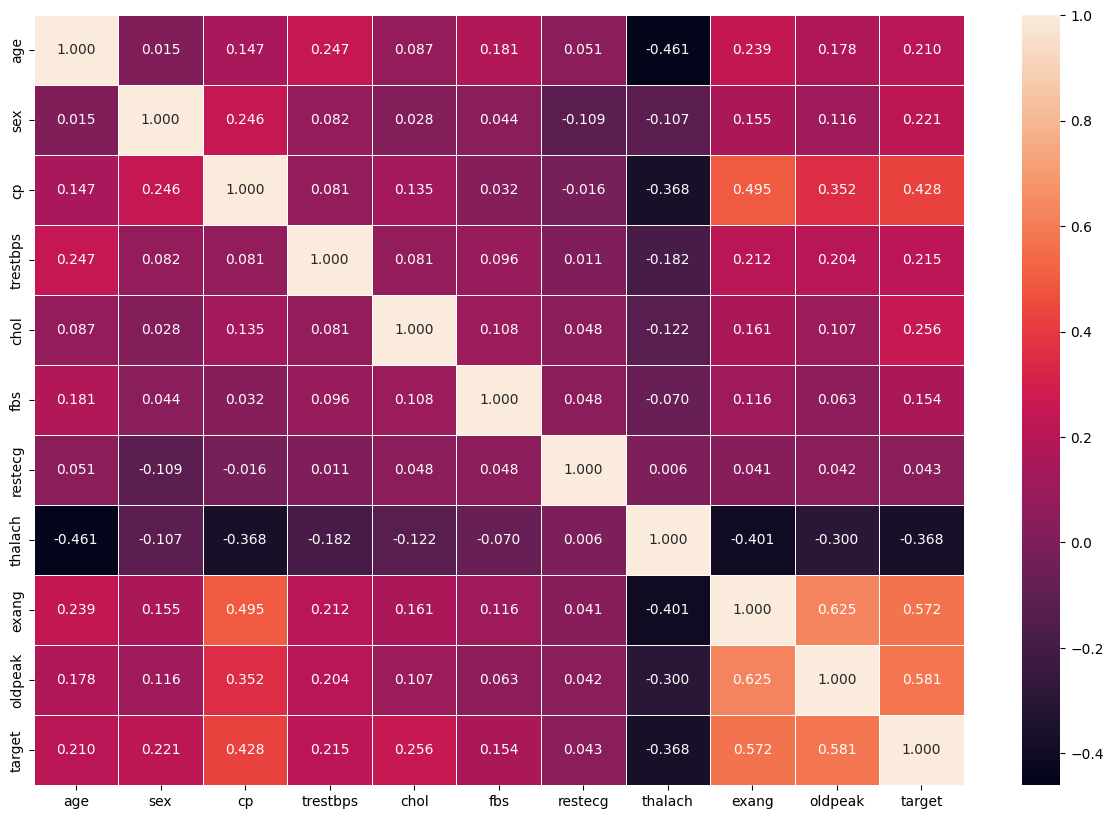

In [41]:
cor_mat=dfClean.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f")

export dataset yang sudah bersih

In [42]:
dfClean.to_csv('df_clean.csv', index=False)

# **6) Mengkontruksi Data**

Penyesuaian tipe data diperlukan, pada hasil data yang diproses memiliki tipe data float dan dapat diproses oleh model.

In [43]:
dfClean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293 entries, 0 to 293
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       293 non-null    float64
 1   sex       293 non-null    float64
 2   cp        293 non-null    float64
 3   trestbps  293 non-null    float64
 4   chol      293 non-null    float64
 5   fbs       293 non-null    float64
 6   restecg   293 non-null    float64
 7   thalach   293 non-null    float64
 8   exang     293 non-null    float64
 9   oldpeak   293 non-null    float64
 10  target    293 non-null    float64
dtypes: float64(11)
memory usage: 27.5 KB


In [44]:
dfClean.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
4,54.0,1.0,3.0,150.0,251.0,0.0,0.0,122.0,0.0,0.0,0.0


Memilih mana data yang merupakan fitur (X) dan target (y)

In [45]:
X = dfClean.drop("target",axis=1).values
y = dfClean.iloc[:,-1]

Sebelum digunakan pada model kita dapat mengecek persebaran data pada masing-masing kelas. Dataset yang mengalami imbalanced akan cenderung menghasilkan model yang tidak bagus.

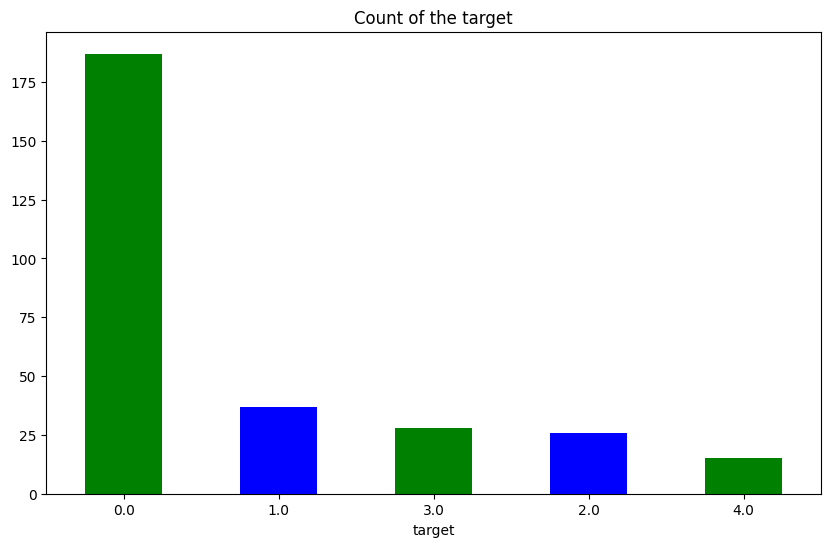

In [46]:
dfClean['target'].value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("Count of the target")
plt.xticks(rotation=0);

Dari grafik yang ditampilkan dapat diketahui bahwa pembagian data masing-masing kelas tidak seimbang sehingga perlu untuk dilakukan penanganan. Terdapat beberapa teknik yang umum digunakan untuk menangani masalah tersebut, yaitu oversampling dan undersampling.
<br>
Pada keadaan saat ini daata terendah sangat sedikit sehingga jika dilakukan undersampling maka akan menghilangkan banyak data penting sehingga pada percobaan ini digunakan teknik oversampling, yaitu SMOTE

In [47]:
from imblearn.over_sampling import SMOTE

In [48]:
# oversampling
smote = SMOTE(random_state=42)
X_smote_resampled, y_smote_resampled = smote.fit_resample(X, y)

In [49]:
columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach',	'exang', 'oldpeak']

# Membuat DataFrame dari data dan kolom
df_smote = pd.DataFrame(X_smote_resampled, columns=columns)
df_smote['target'] = pd.DataFrame(y_smote_resampled)
# Menyimpan DataFrame ke dalam file CSV
df_smote.to_csv('df_smote.csv', index=False)

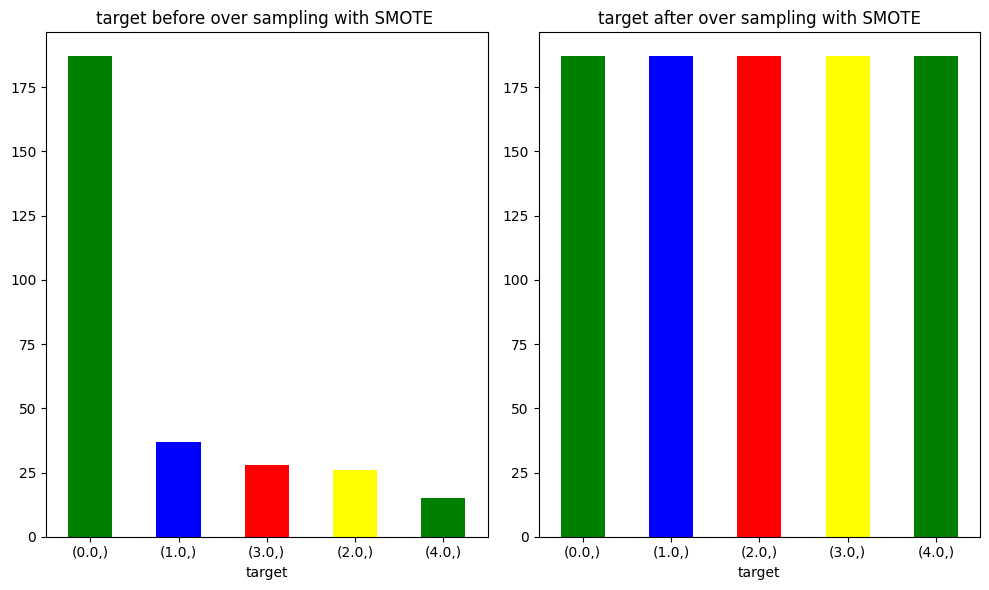

In [50]:

plt.figure(figsize=(12, 4))

new_df1 = pd.DataFrame(data=y)

plt.subplot(1, 2, 1)
new_df1.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','red','yellow'])
plt.title("target before over sampling with SMOTE ")
plt.xticks(rotation=0);


plt.subplot(1, 2, 2)
new_df2 = pd.DataFrame(data=y_smote_resampled)


new_df2.value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue','red','yellow'])
plt.title("target after over sampling with SMOTE")
plt.xticks(rotation=0);

plt.tight_layout()
plt.show()

In [51]:
new_df1 = pd.DataFrame(data=y)
new_df1.value_counts()

target
0.0       187
1.0        37
3.0        28
2.0        26
4.0        15
Name: count, dtype: int64

In [52]:
# over
new_df2 = pd.DataFrame(data=y_smote_resampled)
new_df2.value_counts()

target
0.0       187
1.0       187
2.0       187
3.0       187
4.0       187
Name: count, dtype: int64

Karena menggunakan teknik SMOTE untuk menangani masalah imbalance data dihasilkan data sintetik yang bisa saja mempengaruhi rasio nilai pada setiap fitur sehingga bisa saja memerlukan proses normalisasi

In [53]:
dfClean.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,47.822526,0.726962,2.986348,132.662116,250.860068,0.068259,0.218430,139.058020,0.303754,0.588055,0.795222
std,7.824875,0.446282,0.965049,17.576793,65.059069,0.252622,0.460868,23.558003,0.460665,0.909554,1.238251
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,122.000000,0.000000,0.000000,0.000000
50%,49.000000,1.000000,3.000000,130.000000,248.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,277.000000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,66.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,4.000000


Pada deskripsi diatas dapat dilihat bahwa terdapat rentang nilai yang cukup jauh pada standar deviasi setiap fitur dataset yang kita miliki. Oleh karena itu perlu dilakukan normalisasi/standarisasi agar memperkecil rentang antara standar deviasi setiap kolom.

In [54]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_smote_resampled_normal = scaler.fit_transform(X_smote_resampled)

Export dataset yang digunakan dalam bentuk csv

In [55]:
columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach',	'exang', 'oldpeak']

# Membuat DataFrame dari data dan kolom
df_smote_normal = pd.DataFrame(X_smote_resampled_normal, columns=columns)
df_smote_normal['target'] = pd.DataFrame(y_smote_resampled)
# Menyimpan DataFrame ke dalam file CSV
df_smote_normal.to_csv('df_smote_normal.csv', index=False)

In [56]:
len(X_smote_resampled_normal)

935

In [57]:
dfcek1 = pd.DataFrame(X_smote_resampled_normal)
dfcek1.describe()

,0,1,2,3,4,5,6,7,8,9
count,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000
mean,0.563739,0.842507,0.818224,0.403413,0.341027,0.094277,0.117938,0.453354,0.598398,0.227015
std,0.174873,0.332492,0.274211,0.147493,0.110990,0.252030,0.199527,0.197232,0.450288,0.201293
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.473283,1.000000,0.666667,0.305556,0.267954,0.000000,0.000000,0.312720,0.000000,0.000000
50%,0.578947,1.000000,1.000000,0.387952,0.330240,0.000000,0.000000,0.440606,0.962447,0.200000
75%,0.683363,1.000000,1.000000,0.487481,0.393811,0.000000,0.201473,0.593629,1.000000,0.386166
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Setelah dilakukan normalisasi pada fitur, selanjutnya kita perlu membagi fitur dan target menjadi data train dan test.

In [58]:
from sklearn.model_selection import train_test_split

In [59]:
# membagi fitur dan target menjadi data train dan test (untuk yang oversample saja)
X_train, X_test, y_train, y_test = train_test_split(X_smote_resampled, y_smote_resampled, test_size=0.2, random_state=42,stratify=y_smote_resampled)

In [60]:
# membagi fitur dan target menjadi data train dan test (untuk yang oversample + normalization)
X_train_normal, X_test_normal, y_train_normal, y_test_normal = train_test_split(X_smote_resampled_normal, y_smote_resampled, test_size=0.2, random_state=42,stratify = y_smote_resampled)

# **7) Membangun Model**

Pada percobaan ini menggunakan beberapa model, yaitu KNN, Random Forest, dan XGBoost. Untuk mengetahui performa model menggunakan confusion matrix untuk menghasilkan nilai akurasi, presisi, recall, dan f1-score

In [61]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## KNN

In [62]:
knn_model = KNeighborsClassifier(n_neighbors = 3)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [63]:
import pickle

with open('knn.pkl', 'wb') as file:
    pickle.dump(knn_model, file)

In [64]:
y_pred_knn = knn_model.predict(X_test)

# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote = round(accuracy_score(y_test,y_pred_knn),3)
print("Accuracy:", accuracy_knn_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.754
Classification Report:
              precision    recall  f1-score   support

         0.0       0.65      0.39      0.49        38
         1.0       0.73      0.81      0.77        37
         2.0       0.80      0.86      0.83        37
         3.0       0.77      0.87      0.81        38
         4.0       0.78      0.84      0.81        37

    accuracy                           0.75       187
   macro avg       0.75      0.76      0.74       187
weighted avg       0.74      0.75      0.74       187



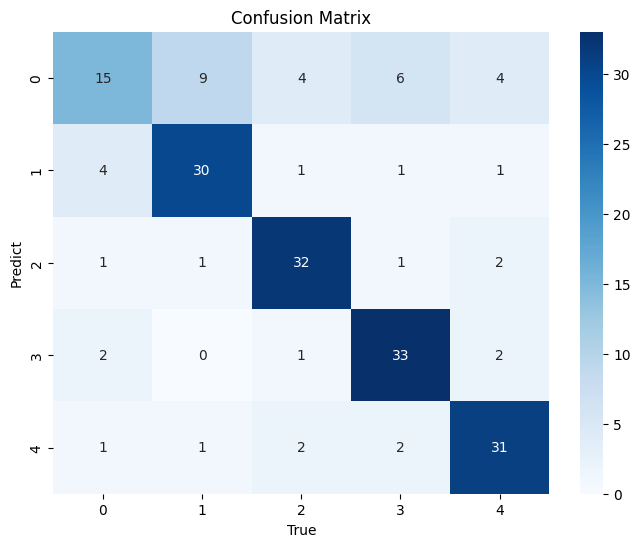

In [65]:
knn_cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8, 6))
sns.heatmap(knn_cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

## Random Forest

In [66]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [67]:
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote = round(accuracy_score(y_test, y_pred_rf),3)
print("Accuracy:",accuracy_rf_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.89      0.92        38
         1.0       0.85      0.92      0.88        37
         2.0       0.89      0.89      0.89        37
         3.0       0.95      0.97      0.96        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



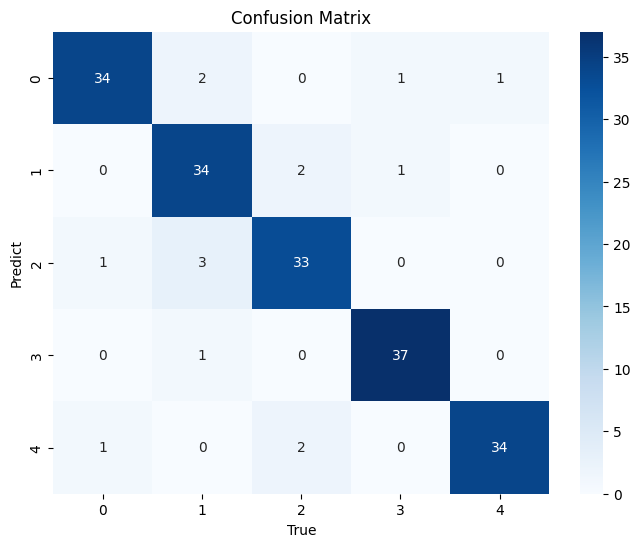

In [68]:
rf_cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

## XGBoost

In [69]:
xgb_model = XGBClassifier(learning_rate=0.1, n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [70]:
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote = round(accuracy_score(y_test, y_pred_xgb),3)
print("Accuracy:",accuracy_xgb_smote)
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))


XGBoost Model:
Accuracy: 0.882
Classification Report:
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89        38
         1.0       0.90      0.76      0.82        37
         2.0       0.82      0.86      0.84        37
         3.0       0.90      0.97      0.94        38
         4.0       0.89      0.92      0.91        37

    accuracy                           0.88       187
   macro avg       0.88      0.88      0.88       187
weighted avg       0.88      0.88      0.88       187



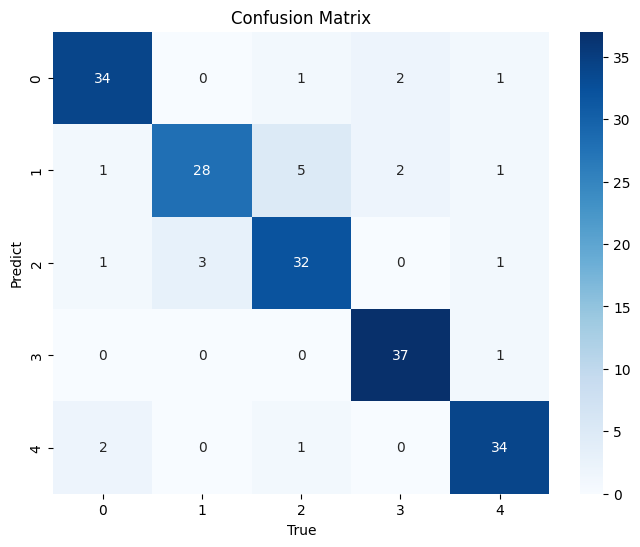

In [71]:
xgb_cm = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(8, 6))
sns.heatmap(xgb_cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

## Tunning

Pada tahap tuning melakukan percobaan-percobaan dengan berbagai parameter untuk memperoleh hasil yang paling optimal. Untuk tuning ini menggunakan library grid search

In [72]:
from sklearn.model_selection import GridSearchCV

### KNN

In [73]:
knn_model = KNeighborsClassifier()

param_grid = {
    "n_neighbors": range(3, 10),
    "metric": ["euclidean", "manhattan", "chebyshev"],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree"],
    "leaf_size": range(10, 20),
}

knn_model_tuning = GridSearchCV(estimator=knn_model, param_grid=param_grid, scoring="accuracy", cv=5)


knn_model_tuning.fit(X_train_normal, y_train_normal)

best_params = knn_model_tuning.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [74]:
y_pred_knn_tuning = knn_model_tuning.predict(X_test_normal)

# Evaluate the KNN model
print("K-Nearest Neighbors (KNN) Model:")
accuracy_knn_smote_normal_Tun = round(accuracy_score(y_test_normal,y_pred_knn_tuning),3)
print("Accuracy:", accuracy_knn_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_knn_tuning))

K-Nearest Neighbors (KNN) Model:
Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

         0.0       0.97      0.84      0.90        38
         1.0       0.80      0.86      0.83        37
         2.0       0.92      0.95      0.93        37
         3.0       0.97      0.95      0.96        38
         4.0       0.95      1.00      0.97        37

    accuracy                           0.92       187
   macro avg       0.92      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



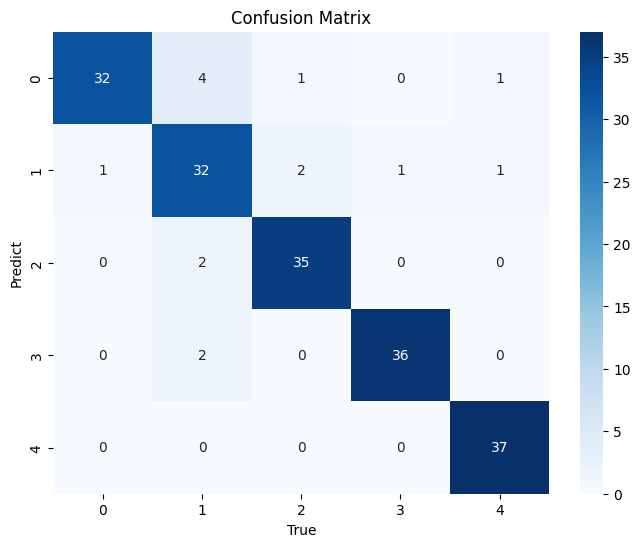

In [75]:
cm_knn_tuning = confusion_matrix(y_test_normal, y_pred_knn_tuning)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn_tuning, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [76]:
import pickle

with open('knn_tuning.pkl', 'wb') as file:
    pickle.dump(knn_model_tuning, file)

### Random Forest

In [77]:
rf_model= RandomForestClassifier()

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [ 10, 15],
    "min_samples_leaf": [1, 2],
    "min_samples_split": [2, 5],
    "max_features": ["sqrt", "log2"],
}

rf_model_tuning = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1)

rf_model_tuning.fit(X_train_normal, y_train_normal)

best_params = rf_model_tuning.best_params_
print(f"Best parameters: {best_params}")


Best parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [78]:
y_pred_rf_tuning = rf_model_tuning.predict(X_test_normal)

# Evaluate the Random Forest model
print("\nRandom Forest Model:")
accuracy_rf_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_rf_tuning),3)
print("Accuracy:",accuracy_rf_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_rf_tuning))


Random Forest Model:
Accuracy: 0.904
Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93        38
         1.0       0.84      0.86      0.85        37
         2.0       0.84      0.86      0.85        37
         3.0       0.92      0.95      0.94        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.90       187
   macro avg       0.90      0.90      0.90       187
weighted avg       0.91      0.90      0.90       187



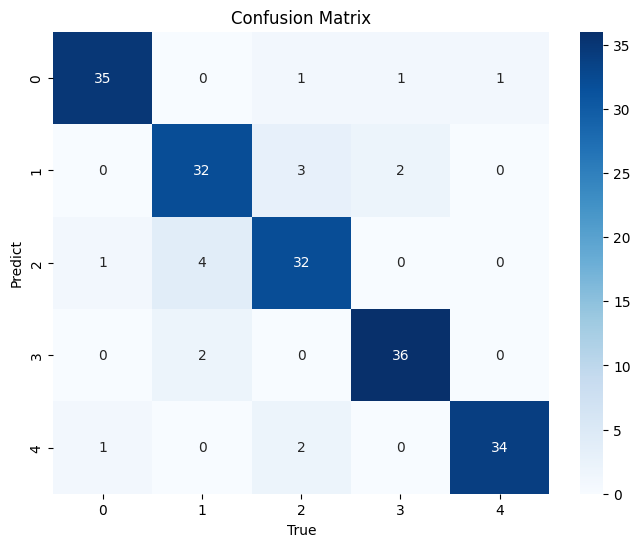

In [79]:
cm_rf_tuning = confusion_matrix(y_test_normal, y_pred_rf_tuning)


plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_tuning, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [80]:
import pickle

with open('rf_tuning.pkl', 'wb') as file:
    pickle.dump(rf_model_tuning, file)

### XGBoost

In [81]:
xgb_model = XGBClassifier()

param_grid = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1],
    "n_estimators": [100, 200],
    "gamma": [0, 0.1],
    "colsample_bytree": [0.7, 0.8],
}

xgb_model_tuning = GridSearchCV(xgb_model, param_grid, cv=5, n_jobs=-1)


xgb_model_tuning.fit(X_train_normal, y_train_normal)

best_params = xgb_model_tuning.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}


In [82]:
y_pred_xgb_tuning = xgb_model_tuning.predict(X_test_normal)

# Evaluate the XGBoost model
print("\nXGBoost Model:")
accuracy_xgb_smote_normal_Tun = round(accuracy_score(y_test_normal, y_pred_xgb_tuning),3)
print("Accuracy:",accuracy_xgb_smote_normal_Tun)
print("Classification Report:")
print(classification_report(y_test_normal, y_pred_xgb_tuning))


XGBoost Model:
Accuracy: 0.914
Classification Report:
              precision    recall  f1-score   support

         0.0       0.88      0.95      0.91        38
         1.0       0.89      0.84      0.86        37
         2.0       0.89      0.86      0.88        37
         3.0       0.95      1.00      0.97        38
         4.0       0.97      0.92      0.94        37

    accuracy                           0.91       187
   macro avg       0.91      0.91      0.91       187
weighted avg       0.91      0.91      0.91       187



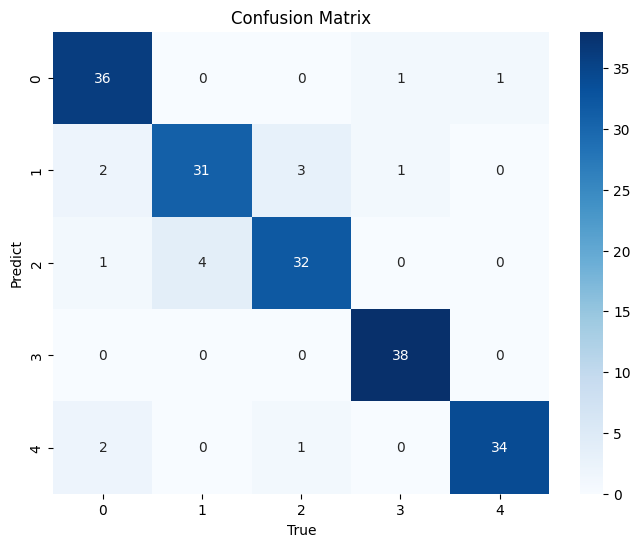

In [83]:
cm = confusion_matrix(y_test_normal, y_pred_xgb_tuning)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predict')
plt.show()

In [84]:
import pickle

with open('xgb_tuning.pkl', 'wb') as file:
    pickle.dump(xgb_model_tuning, file)

# **8) Mengevaluasi Model**

Dari model-model yang telah dibuat dilakukan evaluasi untuk model paling optimal. Pada evaluasi ini menggunakan nilai akurasi untuk menentukan model terbaik.

In [85]:
model_comp1 = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest',
                    'XGBoost'], 'Accuracy': [accuracy_knn_smote*100,
                    accuracy_rf_smote*100,accuracy_xgb_smote*100]})
model_comp1.head()

,Model,Accuracy
0,K-Nearest Neighbour,75.4
1,Random Forest,92.0
2,XGBoost,88.2


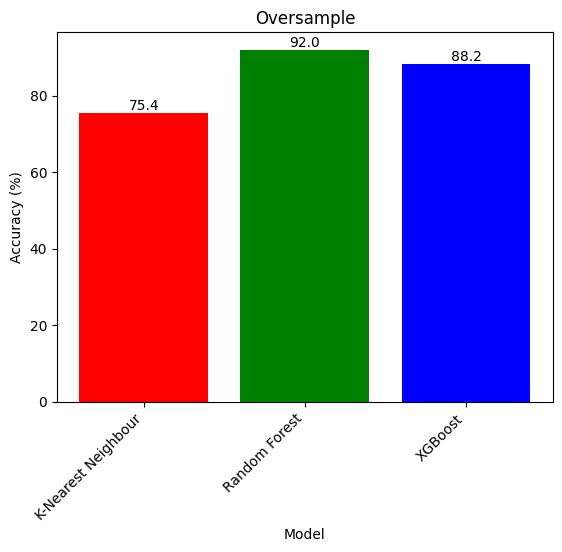

In [86]:
# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp1['Model'], model_comp1['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Oversample')
plt.xticks(rotation=45, ha='right')  # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

In [87]:
model_comp_tuning = pd.DataFrame({'Model': ['K-Nearest Neighbour','Random Forest',
                    'XGBoost'], 'Accuracy': [accuracy_knn_smote_normal_Tun*100,
                    accuracy_rf_smote_normal_Tun*100,accuracy_xgb_smote_normal_Tun*100]})
model_comp_tuning.head()

,Model,Accuracy
0,K-Nearest Neighbour,92.0
1,Random Forest,90.4
2,XGBoost,91.4


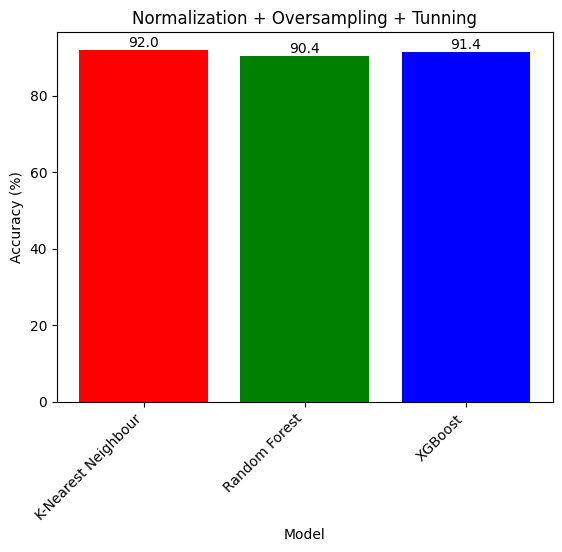

In [88]:

# Membuat bar plot dengan keterangan jumlah
fig, ax = plt.subplots()
bars = plt.bar(model_comp_tuning['Model'], model_comp_tuning['Accuracy'], color=['red', 'green', 'blue'])
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Normalization + Oversampling + Tunning')
plt.xticks(rotation=45, ha='right')  # Untuk memutar label sumbu x agar lebih mudah dibaca

# Menambahkan keterangan jumlah di atas setiap bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

# **9) Streamlit**

URL Streamlit dapat diakses melalui url berikut :

https://heart-disease-bk-13048.streamlit.app/

# **10) Kesimpulan**

1. Berbagai Proses telah dilakukan pada percobaan dengan dataset yang didapat dari https://archive.ics.uci.edu/dataset/45/heart+disease dengan dataset sebanyak 294 data dari dataset hungarian.data
2. Dataset yang di*load* ternyata struktur dataset perlu dilakukan penyusunan ulang, dengan informasi dari dokumentasi pada heart-disease.name diketahui bahwa dataset terdiri dari 74 feature, dilakukan penyusunan ulang data sesuai dengan struktur aslinya.
3. Pada percobaan ini validasi yang dilakukan adalah memastikaan fitur-fitur yang ada dapat digunakan melalui pengecekan konsistensi data dan pengecekan data duplikat.
4. Objek yang digunakan pada percobaan ini dengan melihat konsistensi data pada setiap fitur atau kolom, terdapat banyak fitur yang memiliki missing value sehingga dilakukan seleksi fitur yang didasarkan pada konsistensi data dan dokumentasi dataset, dipilih 14 dataset.
5. Dari fitur-fitur yang telah diseleksi masih terdapat missing value yang tentu akan mempengaruhi kinerja model sehinga dilakukan drop kolom atau menghilangkan fitur yang memiliki missing value banyak.
6. Melakukan kontruksi data dengan mengisi missing value dengan menggunakan mean atau rata-rata. Selain itu karena adanya ketidak seimbangan persebarang kelas dilakukan penanganan ketidak seimbangan data menggunakan SMOTE.
7. Melakukan pemodelan klasifikasi dengan menggunakan beberapa model, yaitu KNN, Random Forest, hingga XGBoost dan melakukan tuning parameter menggunakan grid search untuk mendapatkan model terbaik.
8. Mengevaluasi beberapa model yang digunakan menggunakan confussion matrix untuk mendapatkan nilai akurasi, presisi, dan recall hingga F1 Score dari model-model yang digunakan dan didapatkan model terbaik adalah KNN dengan tuning dengan akurasi 92%